In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('../data/cleaned_data/us_accidents_cleaned_v3.0.csv')

## Hypothesis testing and validation

### Format:  
- Hypothesis:  
H₀ -  
H₁ -  
_This will be tested using:_  
**Result:**

---

Hypothesis 1: More crashes, of a higher severity take place at night, than they do during the day regardless of the weather.  
H₀ - There will be no relationship between time of day and crashes
H₁ - The highest frequency of crashes will be at night proving there is a relationship between time of day and number of crashes  
_This will be tested using:_ 

In [ ]:
# Create consistent readings of what is day and night
df['day_night'] = df['hour'].apply(lambda x: 'Day' if 6 <= x <= 17 else 'Night')

Text(0.5, 1.0, 'Count of Accidents: Day vs Night')

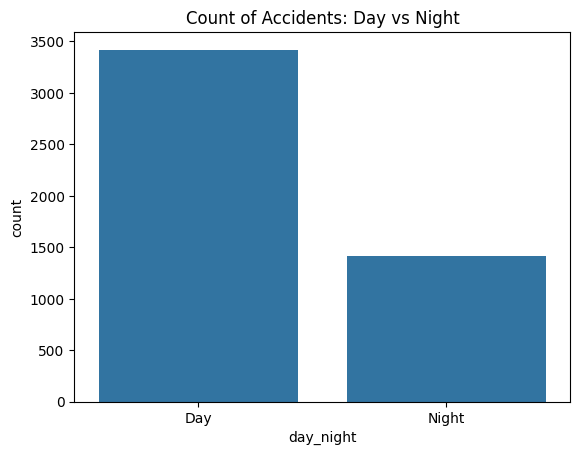

In [ ]:
# Plot count of crashes at day v night
sns.countplot(data=df, x='day_night')
plt.title('Count of Accidents: Day vs Night')

Clearly there are more crashes during the day than at night, so lets look at where the most intense crashes happen.

In [ ]:
# Plotly visual of severity of crash by hour
fig = px.histogram(
    df, 
    x="hour", 
    color="severity", 
    facet_col="day_night", 
    nbins=24,
    title="Accident Severity by Hour: Day vs Night",
    labels={'hour': 'Hour of Day', 'count': 'Number of accidents'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    barmode='stack' # You can change this to 'group' for side-by-side bars
)

# Improve layout
fig.update_layout(bargap=0.1)
fig.show()

# To save correctly:
# fig.write_image("severity_hourly_distribution.png")

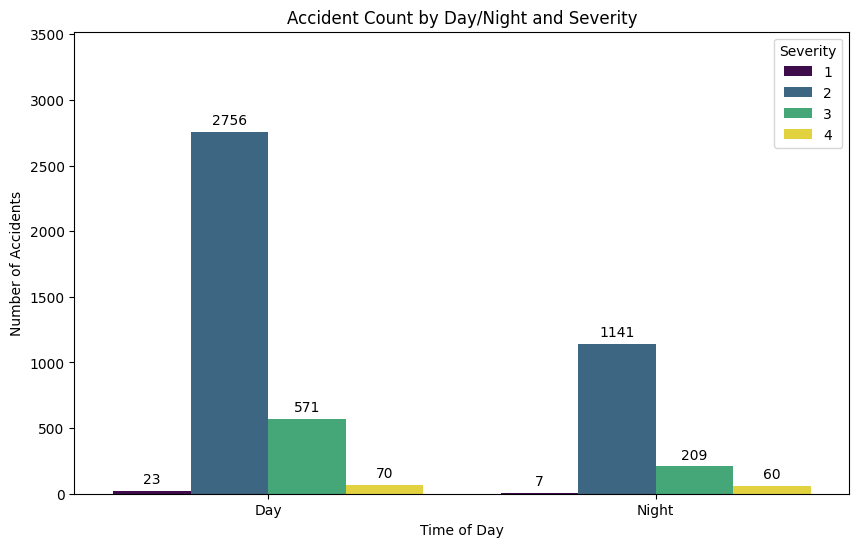

In [ ]:
# Counts of crash by hour and severity
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='day_night', hue='severity', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Accident Count by Day/Night and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.ylim(0, df['day_night'].value_counts().max() + 100) # Give some space for labels
plt.legend(title='Severity')
plt.show()

## Accident Severity Distribution

### DAY
| Severity Level | Percentage (%) |
| :---: | :---: |
| 1 | 0.67 |
| 2 | 80.58 |
| 3 | 16.70 |
| 4 | 2.05 |

---

### NIGHT
| Severity Level | Percentage (%) |
| :---: | :---: |
| 1 | 0.49 |
| 2 | 80.52 |
| 3 | 14.75 |
| 4 | **4.23** |


---

The data reveals a critical trend: while Severity 2 remains the baseline for both periods, the proportion of Severity 4 (Most Severe) accidents **increases by 106%** during the night compared to the day.